In [1]:
print("hi")

hi


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers, applications
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np

import pandas as pd

In [3]:
mname="EfficientNetV2S"
path=f'/home/deepak/weights/{mname}'
print(path)
import os
os.chdir(path)
weightlist=os.listdir(path)


weightlist.sort()
print(weightlist[0])

/home/deepak/weights/EfficientNetV2S
0.136_32EfficientNetV2Sadam.h5


In [4]:
IMAGE_SIZE = 384
EPOCHS=32
shuffle_size=1000
BATCH_SIZE = 32
weights=f'home/deepak/weights/{mname}/'+weightlist[0]
optimizer =tf.keras.optimizers.Adam(learning_rate=0.1)
opt="adam"
los=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
CHANNELS=3
nclasses=2
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
weights

'home/deepak/weights/EfficientNetV2S/0.136_32EfficientNetV2Sadam.h5'

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/deepak/cd",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 11449 files belonging to 2 classes.


2022-05-25 12:37:08.272518: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-25 12:37:11.529086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [6]:
class_names =dataset.class_names
print(class_names)
nclasses=len(class_names)
print(nclasses)

['mel (malignant melanoma)', 'nevus (benign non Cancer)']
2


In [7]:
import os
os.chdir(path)

In [8]:
import tensorflow as tf
  
model=tf.keras.applications.EfficientNetV2S(
    include_top=True,
    weights=weightlist[0],
    input_tensor=None,
    input_shape=None,
    pooling="avg",
    classes=2,
    classifier_activation="softmax"
)

In [9]:
#model=load_model('32efficientv2S91%.h5')

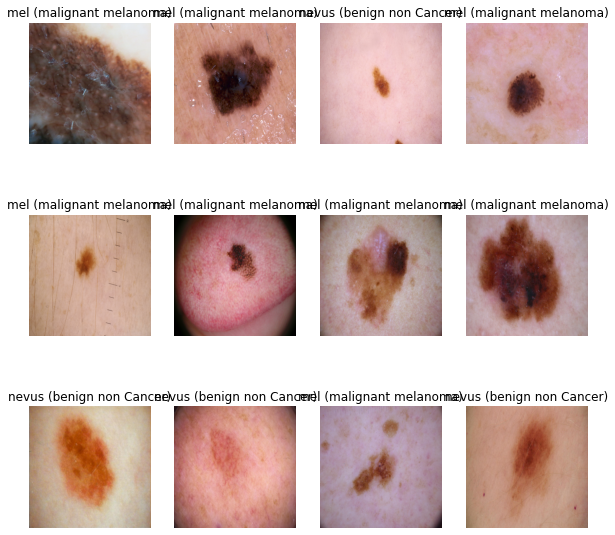

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis('off')

In [11]:
ld=len(dataset)
ld

358

In [12]:
train_size = 0.8
tsize=round(ld*train_size)
tsize

286

In [13]:
train_ds = dataset.take(tsize)
len(train_ds)


286

In [14]:
if(ld==len(dataset)):
  test_ds=dataset.skip(tsize)
else:
  test_size = 0.1
  t1size=round(ld*test_size)
  t1size
  test_ds=dataset.take(t1size)

In [15]:
len(test_ds)

72

In [16]:
val_size = 0.1
vsize=round(ld*val_size)
vsize

36

In [17]:
val_ds = test_ds.take(vsize)
print(len(val_ds))


36


In [18]:
if(ld==len(dataset)):
    test_ds = test_ds.skip(vsize)

In [19]:
len(test_ds)

36

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=shuffle_size):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
if(ld==len(dataset)):
    train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
    print("checked")

checked


In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(buffer_size=tf.data.AUTOTUNE)
#train_ds = train_ds.map(lambda x, y: (smart_resize(, size)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 384, 384, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 192, 192, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 96, 96, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_add (Add)              (None, 96, 96, 48)   0           ['block2c_project_bn[0][0]',     
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_expand_conv (Conv2D)   (None, 96, 96, 192)  82944       ['block2c_add[0][0]']            
                                                                                                  
 block2d_e

                                                                                                  
 block3d_project_bn (BatchNorma  (None, 48, 48, 64)  256         ['block3d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3d_add (Add)              (None, 48, 48, 64)   0           ['block3d_project_bn[0][0]',     
                                                                  'block3c_add[0][0]']            
                                                                                                  
 block4a_expand_conv (Conv2D)   (None, 48, 48, 256)  16384       ['block3d_add[0][0]']            
                                                                                                  
 block4a_expand_bn (BatchNormal  (None, 48, 48, 256)  1024       ['block4a_expand_conv[0][0]']    
 ization) 

 block4c_expand_activation (Act  (None, 24, 24, 512)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_dwconv2 (DepthwiseConv  (None, 24, 24, 512)  4608       ['block4c_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4c_bn (BatchNormalization  (None, 24, 24, 512)  2048       ['block4c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4c_activation (Activation  (None, 24, 24, 512)  0          ['block4c_bn[0][0]']             
 )        

 block4e_activation (Activation  (None, 24, 24, 512)  0          ['block4e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 512)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4e_se_reshape (Reshape)   (None, 1, 1, 512)    0           ['block4e_se_squeeze[0][0]']     
                                                                                                  
 block4e_se_reduce (Conv2D)     (None, 1, 1, 32)     16416       ['block4e_se_reshape[0][0]']     
                                                                                                  
 block4e_s

                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 768)    25344       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 24, 24, 768)  0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 24, 24, 160)  122880      ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_project_bn (BatchNorma  (None, 24, 24, 160)  640        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                  'block5b_add[0][0]']            
                                                                                                  
 block5d_expand_conv (Conv2D)   (None, 24, 24, 960)  153600      ['block5c_add[0][0]']            
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 24, 24, 960)  3840       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5d_expand_activation (Act  (None, 24, 24, 960)  0          ['block5d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5d_d

                                                                                                  
 block5f_dwconv2 (DepthwiseConv  (None, 24, 24, 960)  8640       ['block5f_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5f_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5f_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5f_activation (Activation  (None, 24, 24, 960)  0          ['block5f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5f_s

                                                                                                  
 block5h_se_squeeze (GlobalAver  (None, 960)         0           ['block5h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5h_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5h_se_squeeze[0][0]']     
                                                                                                  
 block5h_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5h_se_reshape[0][0]']     
                                                                                                  
 block5h_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5h_se_reduce[0][0]']      
                                                                                                  
 block5h_s

                                                                                                  
 block6a_se_excite (Multiply)   (None, 12, 12, 960)  0           ['block6a_activation[0][0]',     
                                                                  'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_project_conv (Conv2D)  (None, 12, 12, 256)  245760      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6a_project_bn[0][0]']     
          

                                                                  'block6b_add[0][0]']            
                                                                                                  
 block6d_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6c_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6d_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6d_expand_activation (Act  (None, 12, 12, 1536  0          ['block6d_expand_bn[0][0]']      
 ivation)                       )                                                                 
          

                                                                                                  
 block6f_expand_activation (Act  (None, 12, 12, 1536  0          ['block6f_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6f_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6f_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6f_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6f_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6f_a

 block6h_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6h_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6h_activation (Activation  (None, 12, 12, 1536  0          ['block6h_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6h_se_squeeze (GlobalAver  (None, 1536)        0           ['block6h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6h_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6h_se_squeeze[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block6j_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6j_se_squeeze[0][0]']     
                                                                                                  
 block6j_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6j_se_reshape[0][0]']     
                                                                                                  
 block6j_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6j_se_reduce[0][0]']      
                                                                                                  
 block6j_se_excite (Multiply)   (None, 12, 12, 1536  0           ['block6j_activation[0][0]',     
                                )                                 'block6j_se_expand[0][0]']      
          

                                                                                                  
 block6l_se_excite (Multiply)   (None, 12, 12, 1536  0           ['block6l_activation[0][0]',     
                                )                                 'block6l_se_expand[0][0]']      
                                                                                                  
 block6l_project_conv (Conv2D)  (None, 12, 12, 256)  393216      ['block6l_se_excite[0][0]']      
                                                                                                  
 block6l_project_bn (BatchNorma  (None, 12, 12, 256)  1024       ['block6l_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6l_add (Add)              (None, 12, 12, 256)  0           ['block6l_project_bn[0][0]',     
          

 lization)                                                                                        
                                                                                                  
 block6n_add (Add)              (None, 12, 12, 256)  0           ['block6n_project_bn[0][0]',     
                                                                  'block6m_add[0][0]']            
                                                                                                  
 block6o_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6n_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6o_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6o_expand_conv[0][0]']    
 ization)                       )                                                                 
          

In [26]:
import psutil
  
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])

RAM memory % used: 4.7


In [27]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [28]:
import os
path = "/home/deepak/weights/"
try:
    os.stat(path)
except: 
    os.mkdir(path)
path = "/home/deepak/weights/"+f"{mname}"
import os
try:
    os.stat(path)
except: 
    os.mkdir(path)
os.chdir(path)

In [29]:
model_name = f"_{BATCH_SIZE}"+mname+f"{opt}"
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=os.path.join("logs", model_name))
# saves model checkpoint whenever we reach better weights
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint("{val_loss:.3f}"+model_name+".h5", save_best_only=True, verbose=1)
model_name

'_32EfficientNetV2Sadam'

In [30]:
model.compile(loss=los,
              optimizer=optimizer,
              metrics=['accuracy'])

In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[tensorboard, modelcheckpoint]
)

Epoch 1/32
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-05-25 12:37:45.189464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 37 of 1000
2022-05-25 12:37:55.106884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 72 of 1000
2022-05-25 12:38:05.031810: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 110 of 1000
2022-05-25 12:38:14.933772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 145 of 1000
2022-05-25 12:38:24.969685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 182 of 1000
2022-05-25 12:38:34.866326: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 219 of 1000
2022-05-25 12:38:45.056911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buf

286/286 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9091WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2e787117a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-05-25 12:42:51.190566: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 108 of 1000
2022-05-25 12:43:01.238949: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 221 of 1000
2022-05-25 12:43:11.166455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 335 of 1000
2022-05-25 12:43:12.494517: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2022-05-25 12:43:13.208209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-05-25 12:43:13.208261: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-05-25 12:43:13.208268: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
202


Epoch 1: val_loss improved from inf to 0.23695, saving model to 0.237_32EfficientNetV2Sadam.h5
286/286 [==============================] - 358s 826ms/step - loss: 0.2298 - accuracy: 0.9091 - val_loss: 0.2369 - val_accuracy: 0.9098
Epoch 2/32
286/286 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.9124
Epoch 2: val_loss did not improve from 0.23695
286/286 [==============================] - 179s 625ms/step - loss: 0.2220 - accuracy: 0.9124 - val_loss: 0.2543 - val_accuracy: 0.8884
Epoch 3/32
286/286 [==============================] - ETA: 0s - loss: 0.2199 - accuracy: 0.9121
Epoch 3: val_loss did not improve from 0.23695
286/286 [==============================] - 194s 679ms/step - loss: 0.2199 - accuracy: 0.9121 - val_loss: 0.2943 - val_accuracy: 0.8634
Epoch 4/32
286/286 [==============================] - ETA: 0s - loss: 0.2154 - accuracy: 0.9172
Epoch 4: val_loss did not improve from 0.23695
286/286 [==============================] - 195s 682ms/step - loss: 0.2

Epoch 30/32
286/286 [==============================] - ETA: 0s - loss: 0.2001 - accuracy: 0.9251
Epoch 30: val_loss did not improve from 0.17596
286/286 [==============================] - 195s 680ms/step - loss: 0.2001 - accuracy: 0.9251 - val_loss: 0.1953 - val_accuracy: 0.9250
Epoch 31/32
286/286 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9254
Epoch 31: val_loss did not improve from 0.17596
286/286 [==============================] - 197s 688ms/step - loss: 0.1980 - accuracy: 0.9254 - val_loss: 0.2005 - val_accuracy: 0.9196
Epoch 32/32
286/286 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9237
Epoch 32: val_loss improved from 0.17596 to 0.17528, saving model to 0.175_32EfficientNetV2Sadam.h5
286/286 [==============================] - 198s 691ms/step - loss: 0.1964 - accuracy: 0.9237 - val_loss: 0.1753 - val_accuracy: 0.9286


In [32]:
scores = model.evaluate(test_ds)

2022-05-25 14:23:13.965008: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 103 of 1000
2022-05-25 14:23:23.966910: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 221 of 1000
2022-05-25 14:23:33.995611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 337 of 1000
2022-05-25 14:23:35.035744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


 1/37 [..............................] - ETA: 19:15 - loss: 0.1520 - accuracy: 0.9688

2022-05-25 14:23:35.852227: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-05-25 14:23:35.852291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-05-25 14:23:35.852299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-05-25 14:23:35.852467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


37/37 [==============================] - 38s 158ms/step - loss: 0.2004 - accuracy: 0.9307


In [33]:
scores

[0.20041775703430176, 0.9307432174682617]

In [34]:
history.params

{'verbose': 1, 'epochs': 32, 'steps': 286}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
type(history.history['loss'])

list

In [37]:
len(history.history['loss'])

32

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


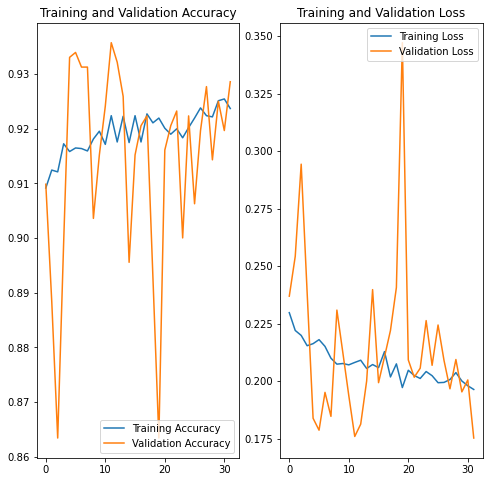

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: nevus (benign non Cancer)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
predicted label: nevus (benign non Cancer)


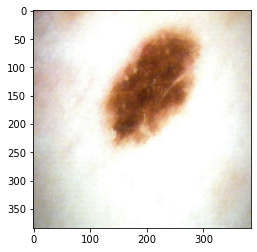

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
tempb=batch_prediction
print(len(tempb[0]))
tempb0=tempb[0]
tempb0.sort()
#print(tempb0)
print(tempb0[-1])

2
0.9713407


In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

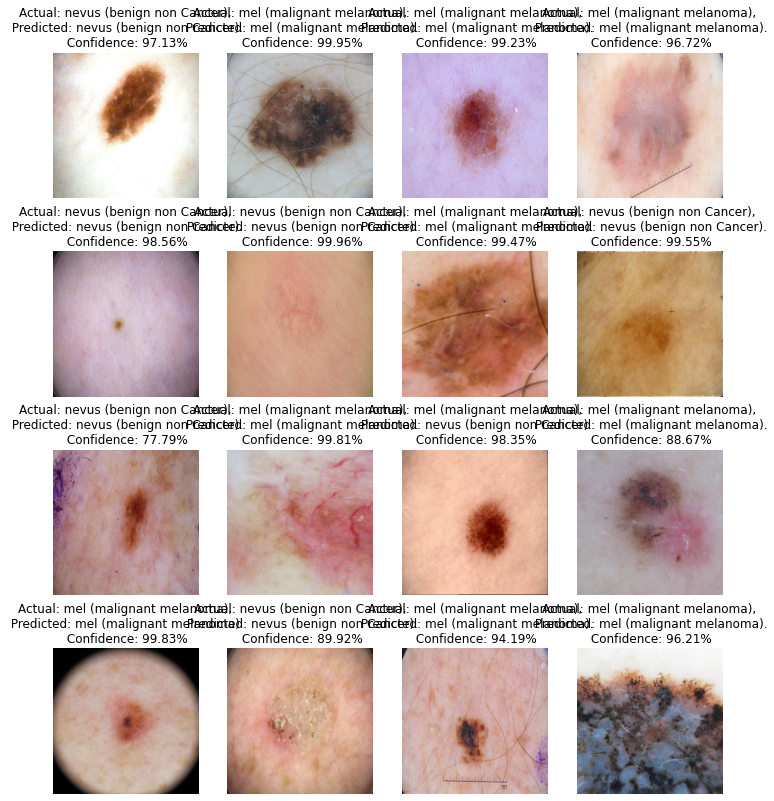

In [43]:
truth=[]
pred=[]
plt.figure(figsize=(12, 14))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        truth.append(actual_class)
        pred.append(predicted_class)
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off") 

In [44]:
path=f'/home/deepak/weights/{mname}'
print(path)
import os
os.chdir(path)
weightlist=os.listdir()

/home/deepak/weights/EfficientNetV2S


In [45]:
weightlist.sort()
weightlist[0]

'0.136_32EfficientNetV2Sadam.h5'

In [46]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd


def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
 
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

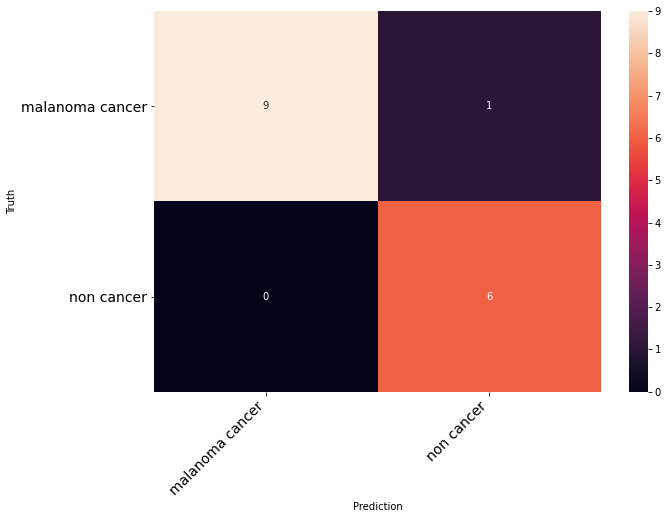

In [47]:
import seaborn as sns
cm = confusion_matrix(truth,pred)
print_confusion_matrix(cm,["malanoma cancer","non cancer"])

In [48]:
print(classification_report(truth, pred))

                           precision    recall  f1-score   support

 mel (malignant melanoma)       1.00      0.90      0.95        10
nevus (benign non Cancer)       0.86      1.00      0.92         6

                 accuracy                           0.94        16
                macro avg       0.93      0.95      0.94        16
             weighted avg       0.95      0.94      0.94        16



In [49]:
import os
os.chdir("/home/deepak")
#model.save("32efficientv2S91%.h5")

In [50]:
from keras.models import load_model

In [51]:
import os
os.chdir("/home/deepak")

(-0.5, 611.5, 381.5, -0.5)

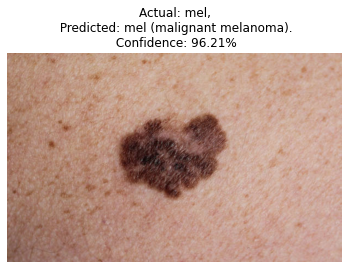

In [52]:
from PIL import Image
from numpy import asarray
actual_class="mel"
timg = Image.open('test image melanoma.jpg')
ctimg= asarray(timg)
plt.imshow(ctimg.astype("uint8"))
predicted_class, confidence = predict(model, ctimg)
plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
plt.axis("off")